In [1]:
# importing libraries    
import numpy as np   
import matplotlib.pyplot as plt    
import pandas as pd    
from sklearn.cluster import KMeans  

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')  
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
display(dataset)
# statistics of the data
dataset.describe()

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
0,1,2,4,19,18,0,1,1479,57000,No,94.736842,5.263158,0.000000,Alternating
1,2,1,4,19,19,0,0,1605,57000,No,100.000000,0.000000,0.000000,Alternating
2,3,2,4,19,18,3,1,1404,57000,No,94.736842,5.263158,15.789474,Alternating
3,4,2,4,19,19,4,0,1782,57000,No,100.000000,0.000000,21.052632,Alternating
4,5,2,4,19,19,6,0,1258,57000,No,100.000000,0.000000,31.578947,Alternating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,320,1,7,8,8,0,0,0,12332,No,100.000000,0.000000,0.000000,Selective
320,321,1,7,6,0,3,6,0,8190,No,0.000000,100.000000,50.000000,Selective
321,322,1,7,7,5,0,2,0,6749,No,71.428571,28.571429,0.000000,Selective
322,323,1,7,7,7,0,0,0,7795,No,100.000000,0.000000,0.000000,Selective


,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,percentage_no_of_correct_responses,oer,cer
count,243.000000,243.000000,243.000000,243.000000,243.00000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,176.592593,1.547325,5.255144,8.872428,8.18107,1.197531,0.691358,354.654321,28034.086420,91.716818,8.224393,11.252970
std,103.655793,0.498783,1.102554,4.528626,4.54547,2.547498,1.351234,534.890237,22934.616163,17.628554,17.680037,23.640500
min,1.000000,1.000000,4.000000,6.000000,0.00000,0.000000,0.000000,0.000000,3000.000000,0.000000,-14.285714,0.000000
25%,61.500000,1.000000,4.000000,6.000000,6.00000,0.000000,0.000000,0.000000,10353.000000,87.500000,0.000000,0.000000
50%,203.000000,2.000000,5.000000,7.000000,7.00000,0.000000,0.000000,0.000000,14207.000000,100.000000,0.000000,0.000000
75%,263.500000,2.000000,6.000000,8.000000,8.00000,1.000000,1.000000,847.500000,57000.000000,100.000000,12.500000,14.285714
max,324.000000,2.000000,7.000000,19.000000,19.00000,19.000000,7.000000,1782.000000,70000.000000,100.000000,100.000000,237.500000


In [3]:
cols = list(dataset.columns.values)
cols.pop(cols.index('cer'))
dataset = dataset[cols+['cer']]

cols = list(dataset.columns.values)
cols.pop(cols.index('oer'))
dataset = dataset[cols+['oer']]

cols = list(dataset.columns.values)
cols.pop(cols.index('child_age'))
dataset = dataset[cols+['child_age']]

dataset.head()

,id,child_gender,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,game,cer,oer,child_age
0,1,2,19,18,0,1,1479,57000,No,94.736842,Alternating,0.000000,5.263158,4
1,2,1,19,19,0,0,1605,57000,No,100.000000,Alternating,0.000000,0.000000,4
2,3,2,19,18,3,1,1404,57000,No,94.736842,Alternating,15.789474,5.263158,4
3,4,2,19,19,4,0,1782,57000,No,100.000000,Alternating,21.052632,0.000000,4
4,5,2,19,19,6,0,1258,57000,No,100.000000,Alternating,31.578947,0.000000,4


In [4]:
#X = dataset.iloc[2,12,13].values
#display(X)

X = dataset.iloc[:, [11, 12, 13]].values  
display(X)

array([[  0.        ,   5.26315789,   4.        ],
       [  0.        ,   0.        ,   4.        ],
       [ 15.78947368,   5.26315789,   4.        ],
       [ 21.05263158,   0.        ,   4.        ],
       [ 31.57894737,   0.        ,   4.        ],
       [ 26.31578947,  21.05263158,   4.        ],
       [ 15.78947368,   0.        ,   4.        ],
       [  0.        ,  21.05263158,   4.        ],
       [  0.        ,   5.26315789,   4.        ],
       [ 10.52631579,  31.57894737,   4.        ],
       [  0.        ,   0.        ,   4.        ],
       [ 10.52631579,   0.        ,   5.        ],
       [  0.        ,   5.26315789,   5.        ],
       [ 10.52631579,  10.52631579,   5.        ],
       [  0.        ,   0.        ,   5.        ],
       [  0.        ,   0.        ,   5.        ],
       [ 21.05263158,   5.26315789,   5.        ],
       [ 10.52631579,   5.26315789,   5.        ],
       [ 26.31578947,   0.        ,   5.        ],
       [ 57.89473684,   0.     

In [5]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# statistics of scaled data
pd.DataFrame(X).describe()

,0,1,2
count,2.430000e+02,2.430000e+02,2.430000e+02
mean,-2.924044e-17,1.023415e-16,5.848088e-17
std,1.002064e+00,1.002064e+00,1.002064e+00
min,-4.769863e-01,-1.275821e+00,-1.140747e+00
25%,-4.769863e-01,-4.661398e-01,-1.140747e+00
50%,-4.769863e-01,-4.661398e-01,-2.318896e-01
75%,1.285508e-01,2.423316e-01,6.769679e-01
max,9.590068e+00,5.201631e+00,1.585825e+00


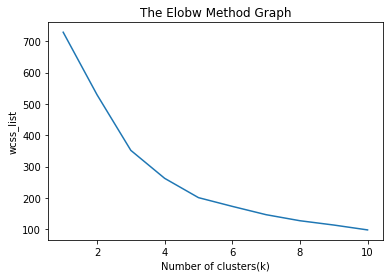

In [6]:
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0]


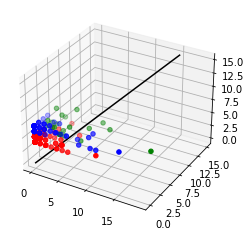

In [7]:
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)
print(y)

dataset['cluster'] = y  
# the above step adds extra column indicating the cluster number for each country

data1 = dataset[dataset.cluster==0]
data2 = dataset[dataset.cluster==1]
data3 = dataset[dataset.cluster==2]
data4 = dataset[dataset.cluster==3]

kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.commission_errors, data1.omission_errors, data1.child_age, c='blue', label = 'Cluster 1')
kplot.scatter3D(data2.commission_errors,data2.omission_errors,data2.child_age, c ='red', label = 'Cluster 2')
kplot.scatter3D(data3.commission_errors,data3.omission_errors,data3.child_age, c ='green', label = 'Cluster 3')
kplot.scatter3D(data4.commission_errors,data4.omission_errors,data4.child_age, c ='deeppink', label = 'Cluster 4')


In [8]:
#data = pd.read_csv('data.csv')
new_df = dataset.iloc[:, [11, 12, 13]].copy()
new_df['clusters'] = y
new_df.head()
display(new_df)

,cer,oer,child_age,clusters
0,0.000000,5.263158,4,1
1,0.000000,0.000000,4,1
2,15.789474,5.263158,4,1
3,21.052632,0.000000,4,1
4,31.578947,0.000000,4,1
...,...,...,...,...
319,0.000000,0.000000,7,0
320,50.000000,100.000000,7,2
321,0.000000,28.571429,7,0
322,0.000000,0.000000,7,0


# Cluster Analysis

## Cluster 1

In [9]:
len(new_df[new_df["clusters"] == 0])

85

In [10]:
cluster_0 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_0['cer'].max()
minVal = cluster_0['cer'].min()

print("CER min - ", minVal)
print("CER max - ", maxVal)
print()

maxVal = cluster_0['oer'].max()
minVal = cluster_0['oer'].min()

print("OER min - ", minVal)
print("OER max - ", maxVal)

CER min -  0.0
CER max -  78.94736842

OER min -  -14.28571429
OER max -  37.5


,cer,oer,child_age,clusters
22,0.000000,0.000000,6,0
23,0.000000,0.000000,6,0
24,52.631579,0.000000,6,0
25,42.105263,0.000000,6,0
26,57.894737,0.000000,6,0
...,...,...,...,...
318,0.000000,0.000000,7,0
319,0.000000,0.000000,7,0
321,0.000000,28.571429,7,0
322,0.000000,0.000000,7,0


<AxesSubplot:>

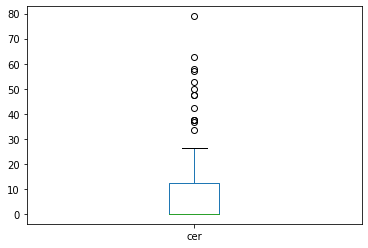

In [11]:
cluster_0 = new_df[new_df["clusters"] == 0 ]
display(cluster_0)
cluster_0.boxplot(column =['cer'], grid = False)

<AxesSubplot:>

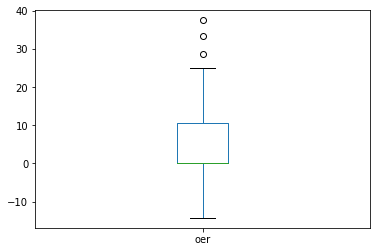

In [12]:
cluster_0.boxplot(column =['oer'], grid = False)

## Cluster 2

In [13]:
len(new_df[new_df["clusters"] == 1])

137

In [14]:
cluster_1 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_1['cer'].max()
minVal = cluster_1['cer'].min()

print("CER min - ", minVal)
print("CER max - ", maxVal)
print()

maxVal = cluster_1['oer'].max()
minVal = cluster_1['oer'].min()

print("OER min - ", minVal)
print("OER max - ", maxVal)

CER min -  0.0
CER max -  83.33333333

OER min -  0.0
OER max -  33.33333333


,cer,oer,child_age,clusters
0,0.000000,5.263158,4,1
1,0.000000,0.000000,4,1
2,15.789474,5.263158,4,1
3,21.052632,0.000000,4,1
4,31.578947,0.000000,4,1
...,...,...,...,...
263,0.000000,0.000000,5,1
264,0.000000,0.000000,5,1
265,0.000000,0.000000,5,1
266,14.285714,0.000000,5,1


<AxesSubplot:>

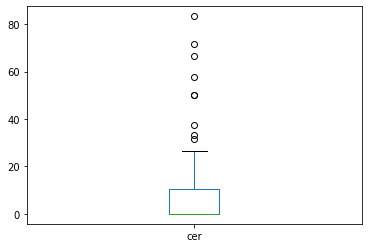

In [15]:
cluster_1 = new_df[new_df["clusters"] == 1 ]
display(cluster_1)
cluster_1.boxplot(column =['cer'], grid = False)

<AxesSubplot:>

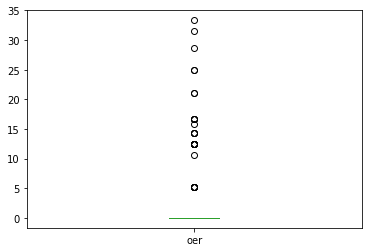

In [16]:
cluster_1.boxplot(column =['oer'], grid = False)

## Cluster 3

In [17]:
len(new_df[new_df["clusters"] == 2])

21

In [18]:
cluster_2 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_2['cer'].max()
minVal = cluster_2['cer'].min()

print("CER min - ", minVal)
print("CER max - ", maxVal)
print()

maxVal = cluster_2['oer'].max()
minVal = cluster_2['oer'].min()

print("OER min - ", minVal)
print("OER max - ", maxVal)

CER min -  0.0
CER max -  237.5

OER min -  25.0
OER max -  100.0


,cer,oer,child_age,clusters
21,47.368421,31.578947,5,2
39,37.500000,37.500000,4,2
40,25.000000,37.500000,4,2
42,25.000000,50.000000,4,2
49,75.000000,37.500000,4,2
51,37.500000,25.000000,5,2
55,37.500000,25.000000,5,2
56,75.000000,62.500000,5,2
58,87.500000,87.500000,5,2
63,50.000000,37.500000,6,2


<AxesSubplot:>

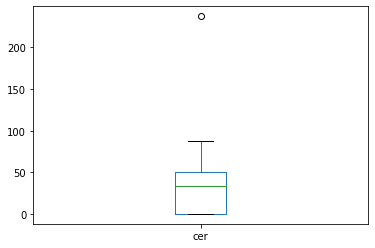

In [19]:
cluster_2 = new_df[new_df["clusters"] == 2 ]
display(cluster_2)
cluster_2.boxplot(column =['cer'], grid = False)

<AxesSubplot:>

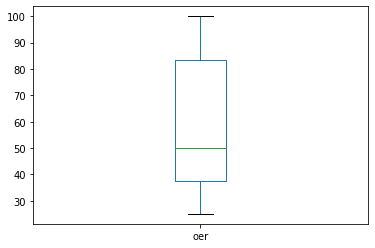

In [20]:
cluster_2.boxplot(column =['oer'], grid = False)

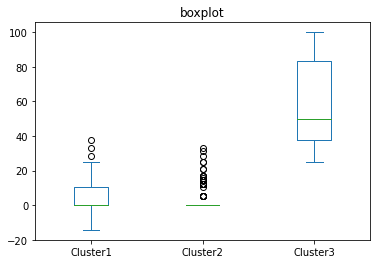

In [21]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['oer'], "Cluster2": cluster_1['oer'], "Cluster3": cluster_2['oer']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

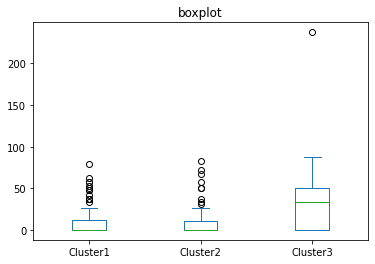

In [22]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_0['cer'], "Cluster2": cluster_1['cer'], "Cluster3": cluster_2['cer']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

## Cluster 4

In [22]:
len(new_df[new_df["clusters"] == 3])

27

In [23]:
cluster_4 = new_df[new_df["clusters"] == 3 ]

maxVal = cluster_4['CER'].max()
minVal = cluster_4['CER'].min()

print("CER min - ", minVal)
print("CER max - ", maxVal)
print()

maxVal = cluster_4['OER'].max()
minVal = cluster_4['OER'].min()

print("OER min - ", minVal)
print("OER max - ", maxVal)

CER min -  0.0
CER max -  0.4

OER min -  0.6
OER max -  1.0


,CER,OER,child_age,clusters
0,0.000000,1.000000,4,3
7,0.000000,1.000000,4,3
8,0.000000,1.000000,4,3
9,0.250000,0.750000,4,3
12,0.400000,0.600000,4,3
14,0.333333,0.666667,4,3
52,0.000000,1.000000,4,3
63,0.000000,1.000000,4,3
65,0.000000,1.000000,4,3
68,0.000000,1.000000,4,3


<AxesSubplot:>

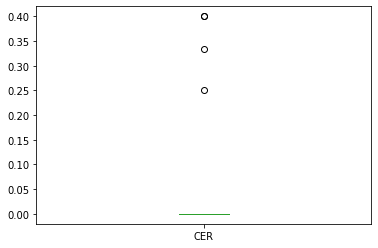

In [24]:
cluster_4 = new_df[new_df["clusters"] == 3 ]
display(cluster_4)
cluster_4.boxplot(column =['CER'], grid = False)

<AxesSubplot:>

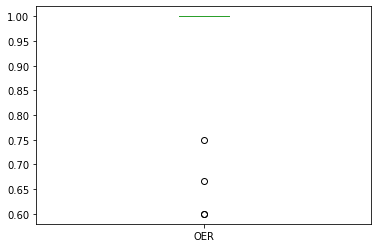

In [25]:
cluster_4.boxplot(column =['OER'], grid = False)